<a href="https://colab.research.google.com/github/alexDahersh/Data-Science-fund./blob/main/Alex_H_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

You would want to include a polynomial element to let your model curve more. Relationships can often be quadratic, cubic, etc, so using a polynomial might be closer to reality. Also, even if you don't have a reason for why based on real life, relationships between variables are often not linear.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

I'd not want to include a polynomial to avoid overfitting. Some relationships are linear and using a polynomial will make the model fit the data rather than reality.

**Task3**:

What's the point of using b splines?

b splines are useful when there are multiple different areas of a variable that relate differently to another variable. It gives more options to model a very curvy relationship rather than just use a higher order polynomial and over fit the data.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a process where the values all follow a multivariate normal distribution. There are an infinite number of variables that all form a big normal distribution but only a finite amount of the variables are known. Time is often used for the infinite dimension and the process is the iteration over time. All the variables in a Gaussian process relate in some way, and the mathematical tool used to show the relationship is covariance. Covariance measures a scaled version of how dependent variables are on each other. When modelling a gaussian process, the covaraince is used to determine how close together certain variables should be, such as how close temperature should be for similar values of time.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


I'm going to use a polynomial model for weight based on height and gender. It should be a cubic relationship between weight and height. Gender is a binary value so adding a polynomial to it is pointless. I'm doing this specific relationship because it fits reality best.

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-scmk9udf
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-scmk9udf
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=49d8f453ad5d70a075334383124e0a8b00996f533e8866801e5cc85e9167cbaf
  Stored in directory: /tmp/pip-ephem-wheel-cache-juzf0uw2/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [8]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [12]:
model_poly = bmb.Model("weight ~ poly(height, 3) + male", howell, family="negativebinomial")
idata_poly = model_poly.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


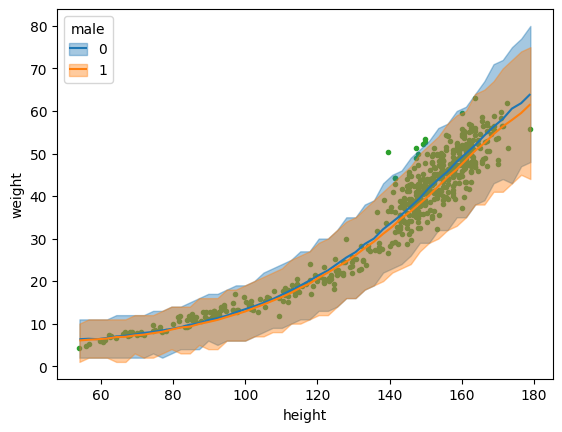

In [13]:
bmb.interpret.plot_predictions(model_poly, idata_poly, ["height","male"], pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that you can spline Gaussian Processes like you can spine polynomial models with b splines.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

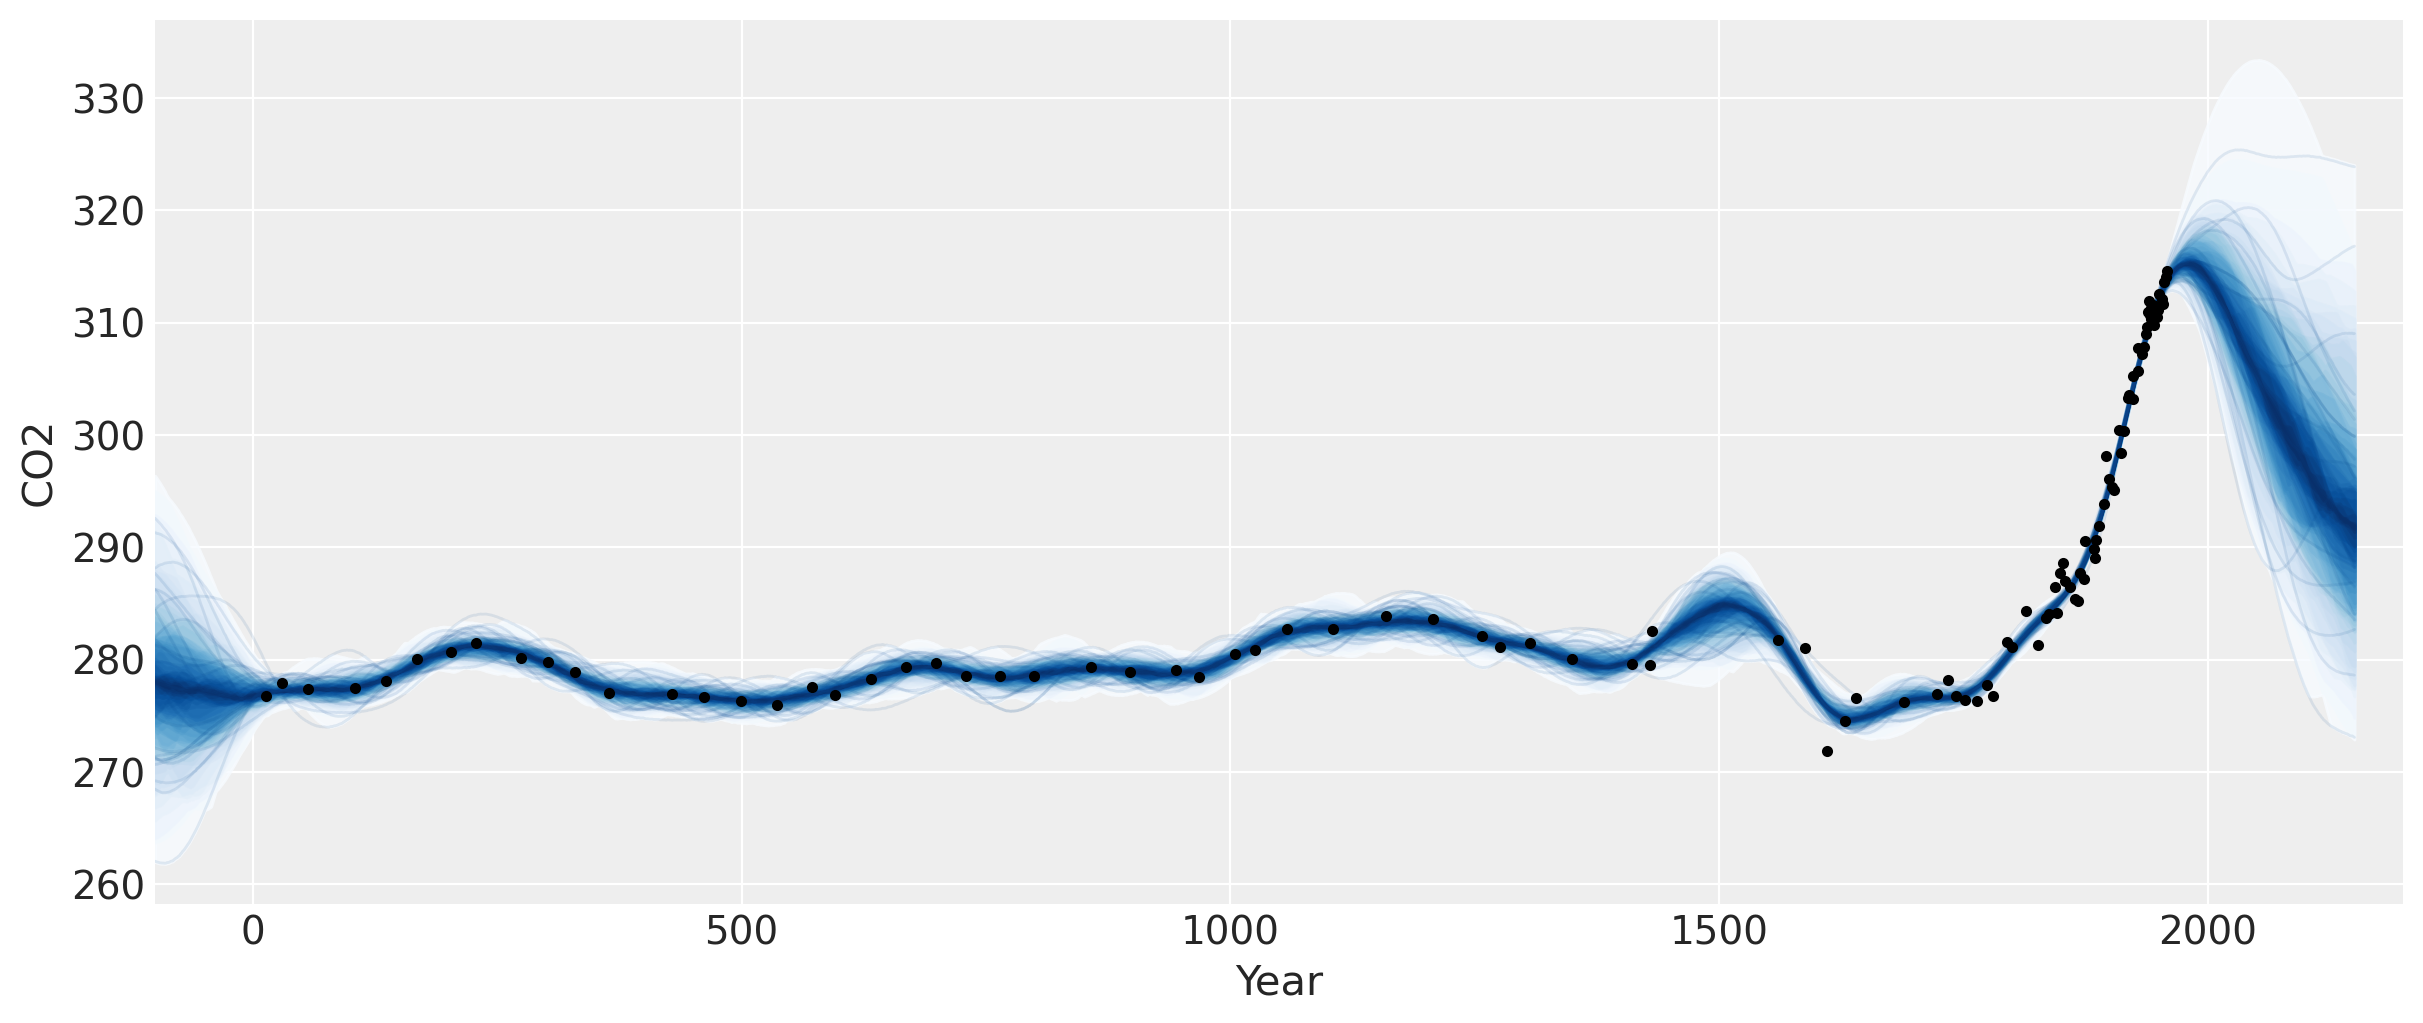




I like this graph because it proves climate change is fake news.

It shows that you can create your model in a way to get the results you want.